# <center> Double Pendulum in Cart </center>
## <center> Lagrangian Equation Derivation </center> 

Import necessary packages

In [1]:
import numpy as np
import sympy as smp
from sympy.solvers.solveset import linsolve
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import PillowWriter

Defining corresponding symbols for each variable:
Note that an extra mass is included (m0, the mass of cart)

In [7]:
t, g = smp.symbols('t g')
m0, m1, m2, M = smp.symbols('m0 m1 m2 M')
L1, L2 = smp.symbols('L1, L2')

In [8]:
the0, the1, the2 = smp.symbols(r'\theta_0, \theta_1, \theta_2', cls=smp.Function)

In [9]:
the0 = the0(t)
the1 = the1(t)
the2 = the2(t)

Derivatives:

In [10]:
the0_d = smp.diff(the0, t)
the1_d = smp.diff(the1, t)
the2_d = smp.diff(the2, t)
the0_dd = smp.diff(the0_d, t)
the1_dd = smp.diff(the1_d, t)
the2_dd = smp.diff(the2_d, t)

* Define Kinetic Energy $T_i$ for each arm
* Define Total Kinetic Energy $T$

In [11]:
I1 = m1*L1**2/12
I2 = m2*L2**2/12
M=m0+m1+m2

In [12]:
T0 = 1/2*m0*smp.diff(the0, t)**2
T1 = 1/2*m1*(  (smp.diff(the0, t) + L1/2*smp.diff(the1, t)*smp.cos(the1))**2  +  (L1/2*smp.diff(the1, t)*smp.sin(the1))**2  )  + 1/2*I1*(smp.diff(the1, t))**2
T2 = 1/2*m2*smp.diff(the0, t)**2 + 1/2*m2*L1**2*(smp.diff(the1, t))**2 + 1/2*(m2*(L2/2)**2+I2)*(smp.diff(the2, t))**2 + m2*L1*smp.diff(the0, t)*smp.diff(the1, t)*smp.cos(the1) + m2*(L2/2)*smp.diff(the0, t)*smp.diff(the2, t)*smp.cos(the2)+m2*L1*(L2/2)*smp.diff(the1, t)*smp.diff(the2, t)*smp.cos(the1-the2)
T = T0+T1+T2

# T = 1/2*M*smp.diff(the0, t)**2 + 1/2*(m1*L1**2 + I1)*smp.diff(the1, t)**2 + m1*L1/2*smp.diff(the0, t)*smp.diff(the1, t)*smp.cos(the1) + 1/2*m2*L1**2*smp.diff(the1, t)**2 + 1/2*(m2*(L2/2)**2+I2)*smp.diff(the2, t)**2 + m2*L1*smp.diff(the0, t)*smp.diff(the1, t)*smp.cos(the1) + m2*(L2/2)*smp.diff(the0, t)*smp.diff(the2, t)*smp.cos(the2)+m2*L1*(L2/2)*smp.diff(the1, t)*smp.diff(the2, t)*smp.cos(the1-the2)

* Define Potential Energy $U_i$ for each arm
* Define Total Kinetic Energy $U$

In [13]:
U0 = 0
U1 = m1*g*(L1/2)*smp.cos(the1)
U2 = m2*g*(L1*smp.cos(the1)+(L2/2)*smp.cos(the2))
U = U0 + U1 + U2

Define **Lagrangian** $L$

In [14]:
L = T - U

In [15]:
L

0.0416666666666667*L1**2*m1*Derivative(\theta_1(t), t)**2 + 0.5*L1**2*m2*Derivative(\theta_1(t), t)**2 + L1*L2*m2*cos(\theta_1(t) - \theta_2(t))*Derivative(\theta_1(t), t)*Derivative(\theta_2(t), t)/2 - L1*g*m1*cos(\theta_1(t))/2 + L1*m2*cos(\theta_1(t))*Derivative(\theta_0(t), t)*Derivative(\theta_1(t), t) + 0.166666666666667*L2**2*m2*Derivative(\theta_2(t), t)**2 + L2*m2*cos(\theta_2(t))*Derivative(\theta_0(t), t)*Derivative(\theta_2(t), t)/2 - g*m2*(L1*cos(\theta_1(t)) + L2*cos(\theta_2(t))/2) + 0.5*m0*Derivative(\theta_0(t), t)**2 + 0.5*m1*(L1**2*sin(\theta_1(t))**2*Derivative(\theta_1(t), t)**2/4 + (L1*cos(\theta_1(t))*Derivative(\theta_1(t), t)/2 + Derivative(\theta_0(t), t))**2) + 0.5*m2*Derivative(\theta_0(t), t)**2

## The Euler-Lagrange Equations is:

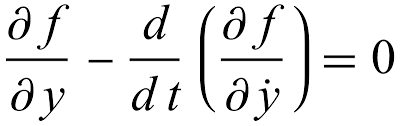

<center> In this case, $f = L$ and $y = \theta$ </center>

Note that LE0 must late rinclude the controller force $u(t)$.

In [17]:
LE0 = smp.diff(L, the0) - smp.diff(smp.diff(L, the0_d), t).simplify()
LE1 = smp.diff(L, the1) - smp.diff(smp.diff(L, the1_d), t).simplify()
LE2 = smp.diff(L, the2) - smp.diff(smp.diff(L, the2_d), t).simplify()

In [16]:
LE0 = (smp.diff(L, the0) - smp.diff(smp.diff(L, the0_d), t).expand()).factor(the0_dd, the1_dd, the2_dd)
LE1 = (smp.diff(L, the1) - smp.diff(smp.diff(L, the1_d), t).expand()).factor(the0_dd, the1_dd, the2_dd)
LE2 = (smp.diff(L, the2) - smp.diff(smp.diff(L, the2_d), t).expand()).factor(the0_dd, the1_dd, the2_dd)

Now, trying to simplify the whole symbolic equation derivation...

In [17]:
LE0

(1.0*L1*m1*sin(\theta_1(t))*Derivative(\theta_1(t), t)**2 + 2*L1*m2*sin(\theta_1(t))*Derivative(\theta_1(t), t)**2 + L2*m2*sin(\theta_2(t))*Derivative(\theta_2(t), t)**2 - L2*m2*cos(\theta_2(t))*Derivative(\theta_2(t), (t, 2)) + (-1.0*L1*m1*cos(\theta_1(t)) - 2*L1*m2*cos(\theta_1(t)))*Derivative(\theta_1(t), (t, 2)) + (-2.0*m0 - 2.0*m1 - 2.0*m2)*Derivative(\theta_0(t), (t, 2)))/2

In [37]:
a, b, c, d = smp.symbols('a, b, c, d')
LE0 = a - b*the0_dd - c*the1_dd - d*the2_dd

In [38]:
LE0

a - b*Derivative(\theta_0(t), (t, 2)) - c*Derivative(\theta_1(t), (t, 2)) - d*Derivative(\theta_2(t), (t, 2))

In [18]:
LE1

L1*(-L2*m2*sin(\theta_1(t) - \theta_2(t))*Derivative(\theta_2(t), t)**2 - L2*m2*cos(\theta_1(t) - \theta_2(t))*Derivative(\theta_2(t), (t, 2)) + g*m1*sin(\theta_1(t)) + 2*g*m2*sin(\theta_1(t)) + (-1.0*m1*cos(\theta_1(t)) - 2*m2*cos(\theta_1(t)))*Derivative(\theta_0(t), (t, 2)) + (-0.5*L1*m1*sin(\theta_1(t))**2 - 0.5*L1*m1*cos(\theta_1(t))**2 - 0.166666666666667*L1*m1 - 2.0*L1*m2)*Derivative(\theta_1(t), (t, 2)))/2

In [30]:
e, f, g, h = smp.symbols('e, f, g, h')
LE1 = e - f*smp.diff(the0, t, 2) + g*smp.diff(the1, t, 2) - h*smp.diff(the2, t, 2)

In [33]:
LE1

e - f*Derivative(\theta_0(t), (t, 2)) + g*Derivative(\theta_1(t), (t, 2)) - h*Derivative(\theta_2(t), (t, 2))

In [20]:
LE1 # simplified

-L1*L2*m2*sin(\theta_1(t) - \theta_2(t))*Derivative(\theta_1(t), t)*Derivative(\theta_2(t), t)/2 + L1*g*m1*sin(\theta_1(t))/2 + L1*g*m2*sin(\theta_1(t)) - L1*m2*sin(\theta_1(t))*Derivative(\theta_0(t), t)*Derivative(\theta_1(t), t) - L1*(0.333333333333333*L1*m1*Derivative(\theta_1(t), (t, 2)) + 1.0*L1*m2*Derivative(\theta_1(t), (t, 2)) - 0.5*L2*m2*sin(\theta_1(t) - \theta_2(t))*Derivative(\theta_1(t), t)*Derivative(\theta_2(t), t) + 0.5*L2*m2*sin(\theta_1(t) - \theta_2(t))*Derivative(\theta_2(t), t)**2 + 0.5*L2*m2*cos(\theta_1(t) - \theta_2(t))*Derivative(\theta_2(t), (t, 2)) - 0.5*m1*sin(\theta_1(t))*Derivative(\theta_0(t), t)*Derivative(\theta_1(t), t) + 0.5*m1*cos(\theta_1(t))*Derivative(\theta_0(t), (t, 2)) - 1.0*m2*sin(\theta_1(t))*Derivative(\theta_0(t), t)*Derivative(\theta_1(t), t) + 1.0*m2*cos(\theta_1(t))*Derivative(\theta_0(t), (t, 2))) + 0.5*m1*(L1**2*sin(\theta_1(t))*cos(\theta_1(t))*Derivative(\theta_1(t), t)**2/2 - L1*(L1*cos(\theta_1(t))*Derivative(\theta_1(t), t)/2 + D

In [19]:
LE2

L2*m2*(L1*sin(\theta_1(t) - \theta_2(t))*Derivative(\theta_1(t), t)**2 - L1*cos(\theta_1(t) - \theta_2(t))*Derivative(\theta_1(t), (t, 2)) - 0.666666666666667*L2*Derivative(\theta_2(t), (t, 2)) + g*sin(\theta_2(t)) - cos(\theta_2(t))*Derivative(\theta_0(t), (t, 2)))/2

In [29]:
i, j, k, l = smp.symbols('i, j, k, l')
LE2 = i - j*smp.diff(the0, t, 2) - k*smp.diff(the1, t, 2) - l*smp.diff(the2, t, 2)

In [34]:
LE2

i - j*Derivative(\theta_0(t), (t, 2)) - k*Derivative(\theta_1(t), (t, 2)) - l*Derivative(\theta_2(t), (t, 2))

In [22]:
LE2 #simplified

L1*L2*m2*sin(\theta_1(t) - \theta_2(t))*Derivative(\theta_1(t), t)*Derivative(\theta_2(t), t)/2 + L2*g*m2*sin(\theta_2(t))/2 - L2*m2*(-L1*(Derivative(\theta_1(t), t) - Derivative(\theta_2(t), t))*sin(\theta_1(t) - \theta_2(t))*Derivative(\theta_1(t), t) + L1*cos(\theta_1(t) - \theta_2(t))*Derivative(\theta_1(t), (t, 2)) + 0.666666666666667*L2*Derivative(\theta_2(t), (t, 2)) - sin(\theta_2(t))*Derivative(\theta_0(t), t)*Derivative(\theta_2(t), t) + cos(\theta_2(t))*Derivative(\theta_0(t), (t, 2)))/2 - L2*m2*sin(\theta_2(t))*Derivative(\theta_0(t), t)*Derivative(\theta_2(t), t)/2

Now expressing the above equations as $\ddot{\theta_i}=\cdots$

In [ ]:
sols = smp.linsolve([LE0, LE1, LE2], (the0_dd, the1_dd, the2_dd))

In [ ]:
sols = smp.solve([LE0, LE1, LE2], (the0_dd, the1_dd, the2_dd), simplify=False, rational=False)

The "**odeint**" solver requires that the maximum order of the differential equation is 1. 

Hence, we define the following as functions that take inputs:

<center> $z_i=\dot{\theta_i}$ </center>

<center> $\dot{z_i}=\ddot{\theta_i}$ </center>

In [40]:
# Here, note that the lambdify is the one that converts the symbolic expressions into numerical functions.

dz1dt_f = smp.lambdify((t,g,m1,m2,L1,L2,the1,the2,the1_d,the2_d), sols[the1_dd])
dz2dt_f = smp.lambdify((t,g,m1,m2,L1,L2,the1,the2,the1_d,the2_d), sols[the2_dd])
dthe1dt_f = smp.lambdify(the1_d, the1_d)
dthe2dt_f = smp.lambdify(the2_d, the2_d)

Moreover, the "**odeint**" solver also requires that we compress the initial conditions $(\theta_i,z_i)$ into a single quantity $\vec{S}$. This enables the solver to compute $\frac{d\vec{S}}{dt}$

In [44]:
def dSdt(S, t, g, m1, m2, L1, L2):
    the1, z1, the2, z2 = S
    return [
        dthe1dt_f(z1),
        dz1dt_f(t, g, m1, m2, L1, L2, the1, the2, z1, z2),
        dthe2dt_f(z2),
        dz2dt_f(t, g, m1, m2, L1, L2, the1, the2, z1, z2),
    ]

Now defining initial conditions:  

In [ ]:
t = np.linspace(0, 40, 1001)  # 1000/40 = 25 calculations per second
g = 9.81
m1= 1
m2= 1
L1 = 1.3
L2 = 1.3

Using the "**odeint**" solver:

Here, y0=[a, b, c, d], where a and c are $\theta_i$ values and b and d are $\dot{\theta_i}$ values

In [ ]:
ans = odeint(dSdt, y0=[0.1, -3, -0.1, 5], t=t, args=(g,m1,m2,L1,L2))

Each row in the "**ans**" matrix yields the $(\theta_1,\dot{\theta_1},\theta_2,\dot{\theta_2})$ state at time $t$

In [ ]:
ans

Upon **transposing**, we obtain a matrix of 4 rows corresponding to the values of each variable mentioned above.

In [51]:
ans.T

array([[  1.        ,   0.87413906,   0.73333306, ...,  -0.88616579,
         -0.70444762,  -0.52275734],
       [ -3.        ,  -3.31025173,  -3.75998052, ...,   4.19459676,
          4.73165892,   4.24973584],
       [ -1.        ,  -0.78277685,  -0.52139856, ...,  12.25096793,
         11.77817817,  11.32116145],
       [  5.        ,   5.91440903,   7.24155048, ..., -11.00398717,
        -12.17998297, -10.37241422]])

In [52]:
the1 = ans.T[0]
the2 = ans.T[2]

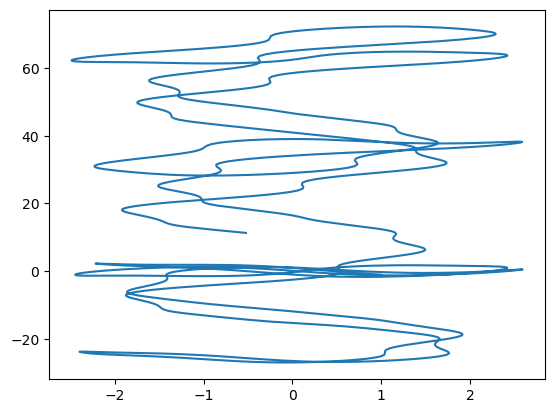

In [58]:
plt.plot(the1, the2)

Having the above data, it is possible to track the location of the pendulums using what we used in **In [18]**

In [60]:
def xy_coords(t, the1, the2, L1, L2):
    return (L1*np.sin(the1),
            -L1*np.cos(the1),
            L1*np.sin(the1) + L2*np.sin(the2),
            -L1*np.cos(the1) - L2*np.cos(the2))

x1, y1, x2, y2 = xy_coords(t, ans.T[0], ans.T[2], L1, L2)

## Animating

In [ ]:
def animate(i):
    ln1.set_data([0, x1[i], x2[i]], [0, y1[i], y2[i]])
    
fig, ax = plt.subplots(1,1, figsize=(8,8))
ax.set_facecolor('k')
# ax.get_xaxis().set_ticks([])   
# ax.get_yaxis().set_ticks([])    
ln1, = plt.plot([], [], 'ro--', lw=3, markersize=8)
ax.set_ylim(-4,4)
ax.set_xlim(-4,4)
ani = animation.FuncAnimration(fig, animate, frames=1000, interval=50)
ani.save('swing.gif',writer='pillow',fps=25)